# Project Setting: 


- We are an investment advisory firm, powered by data science.  We use data science to:
    1. Help investors gain better understanding into opportunities and trends within the peer-to-peer lending landscape, and more specifically,
    2. Choose loans in a more nuanced and systematic manner, using data visualizations and machine learning models that we developed

## Stage 0: Background

### Goal: 
- Set stage for audience
- Introduce Lending Club P2P business and existing data
- Important background on how lending changed since the 2008 financial crisis, and some opportunities that exist in this new and growing space..."

**Jon:** Kind of against mentioning 2008 crisis since we aren't specifically investigating it

Bank lending declined dramatically during the crisis, and despite the period of very low interest rates since, lending has failed to recover.  The evidence shows that the reductions in bank lending are closely associated with changes in regulation and monetary policy
- Regulations: Basel 3 and Dodd/Frank regulations
- Monetary policy: interest on excess reserves (IOER) effectively "paying banks not to lend"
- Source: https://www.bakerinstitute.org/media/files/files/97fc7f24/bi-brief-011019-cpf-banklending.pdf

A combination of increasingly powerful technology and this gap in lending by banks lead to the rise of P2P lending within the FinTech industry: P2P lending experienced rapid growth as borrwers looked for alternatives to banks:
- Growth from 2009 to 2014: 26 million USD to 1.7 billion USD.  Source: https://www.pmifunds.com/prime-meridian-featured-lendits-blog/
- Growth from 2015 to 2019: The study found that digital lenders more than doubled their market share in the past four years, with consumers across the credit spectrum increasingly turning to fintechs like LendingClub and Social Finance.  Fintechs now provide 49.4% of unsecured personal loans as of March, compared with 22.4% in 2015, according to Experian.  Source: https://www.americanbanker.com/news/fintechs-continue-to-take-market-share-from-banks-new-survey-finds
- LendingClub, despite having challenges in 2016 is now the leading personal loan provider in the US. Other players fill the gaps, targeting almost every credit profile imaginable. We have companies like Avant and LendingPoint which focus on near prime consumers. LendingClub, Prosper and Upgrade have focused increasingly on prime and super-prime consumers. Mixed in we have companies like Upstart and SoFi who have catered to millennials and those who may have a thin credit profile but would otherwise be considered prime consumers. Source: https://www.lendacademy.com/a-look-back-at-the-five-years-since-the-lendingclub-ipo/

What makes P2P lending different?  What are these advantages?
- Peer-to-peer lending is the practice of matching borrowers and lenders through online platforms. Borrowers are often able to gain access to funds quickly, and typically at lower interest rates than banks, making it an attractive loan alternative comparative to banks. The loans issued are often comprised of many different investors ranging from individuals to institutional investors.
- Individual and professional investors benefit by being able to lend money at a range of interest rates based on proprietary credit scores assigned by each platform. Since investors typically fund only a portion of a loan and spread the amount they loan across many buyers, investors can potentially receive steady, attractive returns while spreading risk across multiple borrowers.
- [VJ] 63% of americans do not have enough money to cover $500 emergency. When they do need the money, P2P lending is a convenient option 
- [VJ] Average US FICO score has been on a rise since the great recession. This indicates that comsumer credit is healthy (lower risk to lend to them) and also potentaill more people are eligible for Lending Club. 


- Source: https://www.pmifunds.com/prime-meridian-featured-lendits-blog/
- [VJ]Source: https://www.forbes.com/sites/maggiemcgrath/2016/01/06/63-of-americans-dont-have-enough-savings-to-cover-a-500-emergency/#13ce8804e0d9
- [VJ]Source: https://www.fico.com/blogs/us-average-fico-score-hits-700-milestone-consumers

Where does LendingClub fit into this growing landscape?
- On the basis of the borrower’s credit score, credit history, desired loan amount and the borrower’s debt-to-income ratio, LendingClub determines whether the borrower is creditworthy and assigns to its approved loans a credit grade that determines the payable interest rate and fees.  Source: https://en.wikipedia.org/wiki/LendingClub
- To reduce default risk, LendingClub focuses on high-credit-worthy borrowers, declining approximately 90% of the loan applications it received as of 2012 and assigning higher interest rates to riskier borrowers within its credit criteria. Only borrowers with FICO score of 660 or higher can be approved for loans.  Source: https://en.wikipedia.org/wiki/LendingClub
- LendingClub was really well-respected back in 2013.  "Google Inc. is making the bulk of a 125 million dollar investment into San Francisco-based Lending Club.  Google is investing in Lending Club by buying shares of the startup from its existing investors, with those investors selling 15% to 20% of their stakes in the company, in what is known as a secondary transaction.  In recent months, Lending Club has also added some heavyweight financial names to its board, including Kleiner partner Mary Meeker, former Morgan Stanley CEO John Mack, as well as former Treasury Secretary Larry Summers." Source: https://blogs.wsj.com/digits/2013/05/02/google-makes-strategic-investment-in-lending-club/
- "As of 2016, LendingClub's unsecured consumer lending exhibited inherent credit risk and lending efficiency that resembled the risk and efficiency of the largest traditional lenders," the researchers wrote. They included Joseph Hughes, an economics professor at Rutgers University, along with Julapa Jagtiani of the Philadelphia Fed and Choon-Geol Moon of Hanyang University. Source: https://www.thestreet.com/markets/lendingclub-computers-no-worse-at-lending-than-humans-study-finds-14914936

# Stage 1: Introduce Lending Club

## Goal: 
- PPT: Screenshots of investor website
- EDA that describes Lending Club


In [1]:
# Load packages
import pandas as pd
import numpy as np
import re
from time import strptime  # format data columns
import random  # used in subsampling
import warnings
import math

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import plotly.express as px

warnings.filterwarnings("ignore")  # ignore warnings throughout notebook
pd.set_option("display.max_columns", None)  # show all columns


In [2]:
# Load Data
filepath = "../data/accepted_subsampled_5percent.csv" #will be personalized
df = pd.read_csv(filepath, sep=",")

df_cleaned = df.copy() #work from second copy


In [3]:
# Features known to investors based on LC website
known_vars = ['acc_now_delinq',             # accounts now deliquent
              'collections_12_mths_ex_med', # collections excluding medical
              'fico_range_high',            # credit score range
              'fico_range_low',             # creit score range
              'delinq_2yrs',                # delinquencies in last two years
              'delinq_amnt',                # delinquency amount
              'earliest_cr_line',           # earliest credit line
              'home_ownership',             # home ownership
              'dti',                        # debt2income ratio
              'annual_inc',                 # annual income
              'initial_list_status',        # initial listing status
              'inq_last_6mths',             # credit inquires in last 6mo
              'int_rate',                   # interest rate
              'verification_status_joint',  # is this a joint app
              'emp_length',                 # length of employment (yr)
              'loan_amnt',                  # loan amount
              'id',                         # loan id
              'purpose',                    # purpose of the loan
              'term',                       # loan term (3 or 5yr)
              'addr_state',                 # borrower location state
              'installment',                # montly payment
              'mths_since_last_delinq',     # mo since last delinquency
              'mths_since_last_major_derog',# mo since last maj. derogatory
              'mths_since_last_record',     # mo since last public record
              'open_acc',                   # open credit line
              'pub_rec',                    # public records on file
              'revol_util',                 # revolving balance utilization (%)
              'revol_bal',                  # revolving credit balance ($)
              'tot_coll_amt',               # total collection amount ever
              'total_acc',                  # total credit lines
              'tot_cur_bal',                # total current balance
              'verification_status'         # verified income (Y/N I think)
             ]

# Sanity check, print variable if not found within original dataframe
# [ print(var) for var in known_vars if (var not in df.columns)]


## Feature Engineering

In [4]:
#Assess missingness of known variables
missingness = df_cleaned[known_vars].isnull().mean().T
missingness = missingness.loc[missingness>0].sort_values(ascending=False)
missingness



verification_status_joint      0.949313
mths_since_last_record         0.838543
mths_since_last_major_derog    0.744395
mths_since_last_delinq         0.513786
emp_length                     0.063868
tot_cur_bal                    0.033430
tot_coll_amt                   0.033430
revol_util                     0.001006
dti                            0.000829
collections_12_mths_ex_med     0.000476
open_acc                       0.000185
pub_rec                        0.000185
total_acc                      0.000185
inq_last_6mths                 0.000185
earliest_cr_line               0.000185
delinq_amnt                    0.000185
delinq_2yrs                    0.000185
acc_now_delinq                 0.000185
dtype: float64

In [5]:
# Convert loan_status to numeric
df_cleaned['loan_status'] = df_cleaned['loan_status'].str.replace('(', '').str.replace(')', '')
df_cleaned['term_year'] = np.where(df_cleaned['term']==' 36 months', 3,5)


In [6]:
# Create new feature 'loan_status_final': simplifies 'load_status' variable (Paid, Charged, Late, Current, Grade)
loan_status = df_cleaned['loan_status'].unique() #list of unique values
loan_status_final = ['Fully Paid',
                     'Fully Paid',
                     'Charged Off',
                     'Charged Off',
                     'Late', 
                     'Current', 
                     'Late', 
                     'Grace Period']
#df of old and new loan status features
loan_status_map = pd.DataFrame(list(zip(loan_status, loan_status_final)), 
                               columns=['loan_status',
                                        'loan_status_final'])
df_cleaned = pd.merge(df_cleaned, loan_status_map, on='loan_status', how='inner') #merge on df_cleaned

#Isolate only completed loans for analyses 
loancomp_bool = df_cleaned['loan_status_final'].str.contains(pat='Off|Fully')
df_cleaned = df_cleaned.loc[loancomp_bool] #only contains completed loans


In [7]:
# Reformat date features and calculate features related to prepayment  
df_cleaned['issue_date'] = pd.to_datetime(df_cleaned['issue_d'])

df_cleaned['last_pymnt_date'] = pd.to_datetime(df_cleaned['last_pymnt_d'])

df_cleaned['exp_last_pymnt_date'] = pd.to_datetime(df_cleaned['issue_d'].str[0:3]
                                                   +'-'
                                                   + (df_cleaned['issue_d'].str[-4:].astype('int')
                                                   + df_cleaned['term_year']).astype('str'))

df_cleaned['days_outstanding'] = (df_cleaned['last_pymnt_date'] - df_cleaned['issue_date']).dt.days


In [8]:
# Create new binary features indicating if borrow prepaid the loan or has a public record
df_cleaned['pub_rec_flag'] = np.where(df_cleaned['pub_rec']>0,1,0)

df_cleaned['prepayment_flag'] = np.where((df_cleaned.loan_status_final=='Fully Paid')&(df_cleaned.last_pymnt_date < df_cleaned.exp_last_pymnt_date), 1, 0)


In [9]:
#Create ROI feature
df_cleaned["return_on_investment"] = 100.0 * (df_cleaned["total_pymnt"] / df_cleaned["funded_amnt"] - 1.0)


In [10]:
#Isolate only completed loans for analyses 
loancomp_bool = df_cleaned['loan_status_final'].str.contains(pat='Off|Fully')
df_cleaned = df_cleaned.loc[loancomp_bool] #only contains completed loans


In [11]:
# # Sanity Check
# df_cleaned[['term',
#             'loan_status_final',
#             'pub_rec','pub_rec_flag',
#             'issue_d','issue_date',
#             'last_pymnt_d',
#             'last_pymnt_date',
#             'exp_last_pymnt_date',
#             'exp_last_pymnt_date',
#             'days_outstanding',
#             'prepayment_flag']].sample(10)


### Question 1.1: 
How many loans were issued each year? (from Jon)

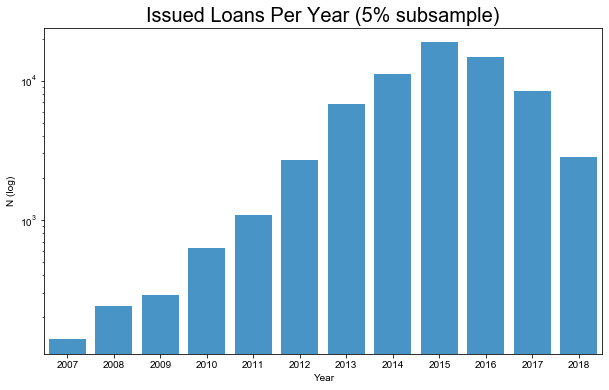

In [12]:
# #Table
# loan_peryear_summary = df.groupby('issue_year')['issue_year'].count()
# print(loan_peryear_summary)

#Plot
plt.figure(figsize=(10,6))
loan_peryear_plt = sns.countplot(x=df_cleaned.issue_year, 
                   data=df_cleaned, 
                   color="#3498db")
loan_peryear_plt.set_yscale('log')
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Issued Loans Per Year (5% subsample)')
plt.ylabel('N (log)')
plt.xlabel('Year')
plt.show(loan_peryear_plt)

### Question 1.2: 
What are the reasons (purpose) for the loans? (from Jon)

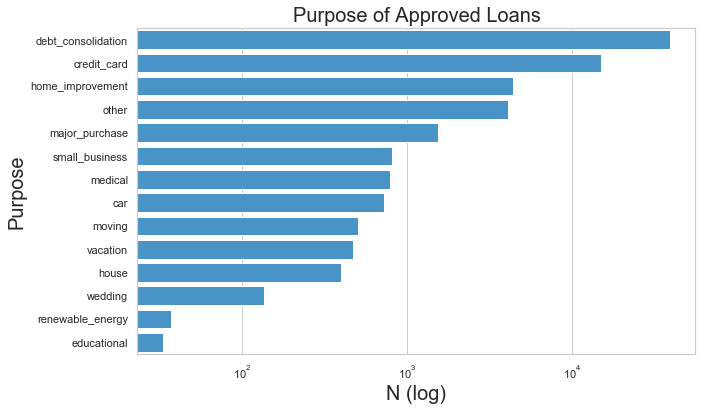

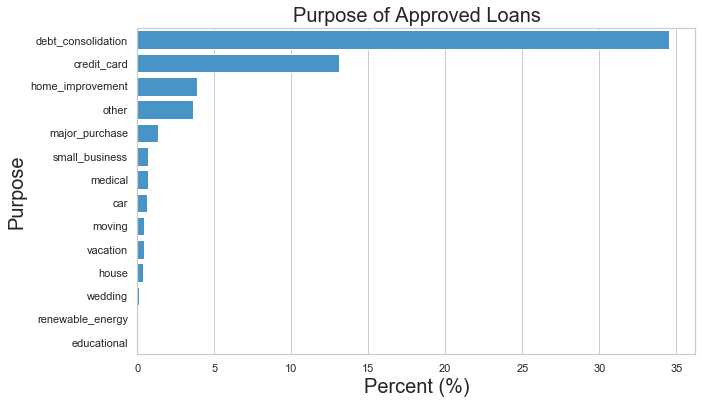

In [13]:
#Table
purp_count = pd.DataFrame(df_cleaned.groupby('purpose')['id'].count()).reset_index() #convert groupby series to DF
purp_count.columns = ['purpose','n'] #rename df
purp_count['perc'] = purp_count['n'].div(df.shape[0]*0.01) #calculate percentage
purp_count.sort_values(by='perc', ascending=False, inplace=True) #sort DF percentage
# print(ans_q5)

#Plot By Count
plt.figure(figsize=(10,6))
purpose_count_plt = sns.barplot(x=purp_count.n,
                       y=purp_count.purpose,
                       data=purp_count,
                       color="#3498db")
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
purpose_count_plt.set_xscale('log')
plt.title('Purpose of Approved Loans')
plt.xlabel('N (log)')
plt.ylabel('Purpose')
plt.show(purpose_count_plt)

#Plot By Percentage
plt.figure(figsize=(10,6))
purpose_perc_plt = sns.barplot(x=purp_count.perc,
                 y=purp_count.purpose,
                 data=purp_count,
                 color="#3498db")
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Purpose of Approved Loans')
plt.xlabel('Percent (%)')
plt.ylabel('Purpose')
plt.show(purpose_perc_plt)


### Question 1.3: 
What is the distribution of loan grades (evaluation of borrower)? (from Jon)

In [14]:
#Helper Function - Count based on two conditions

def count_n(feature1, feature2, for_plot):
    '''
    Purpose: Return number of loans corresponding to two conditions (A and B)
        Ex: number of Grade A loans in year 2018
    Input: 
        feature1
        feature2
        for_plot = True or False
            Ploting results requires different output format
    Output:
        if for_plot=T -> df arranged for plot
        if for_plot=F -> df arranged for table
    '''
    
    #Create sorted list of unique categorical values per feature
    uniq_feat1 = sorted(set(df_cleaned[feature1])) #sorted() returns list
    uniq_feat2 = sorted(set(df_cleaned[feature2]))
      
    #Create inner function that would calculate the count per conditional statement
    def subfunc(feature1, val1, feature2, val2, for_plot):
        '''
        Input: 
            feat1 = 1st feature of condition A
            val1 = 1st value of A for conditional statement
            feat2 = 2nd feature of condition A
            val2 = 2nd value of A for conditional statement
        '''
        n = df_cleaned[ (df_cleaned[feature1]==val1) & (df_cleaned[feature2]==val2) ]['issue_year'].count()
        if for_plot:           
            return [val1, val2, n]
        else:
            return n
    
    #Run subfunction to determine count per conditional statements
    store = [ subfunc(feature1, val1, feature2, val2, for_plot) for val1 in uniq_feat1 for val2 in uniq_feat2 ]
    
    #Format output
    if for_plot:
        df_count = pd.DataFrame(store, columns=[feature1, feature2,'count'])
    else:
        #Convert list to matrix
        mat_count = np.matrix(store).reshape(len(uniq_feat1), len(uniq_feat2))

        #Convert matrix to dataframe (with column and row names)
        df_count = pd.DataFrame(data=mat_count, columns=uniq_feat2, index=uniq_feat1)
        
    return df_count

In [15]:
#Helper Function
def norm_by(table, by_row):
    '''
    Purpose: Normalize matrix table for heatmap
    Input: 
        table (ex: ans6_table)
        by_row = True (normalize by row) or False (normalize by column)
    Output:
        table
    '''
    if by_row:
        nrow = table.shape[0]
        for rowz in range(nrow):
            table.iloc[rowz,:] = round(table.iloc[rowz,:] / table.iloc[rowz,:].sum() * 100, 1)
    else:
        for colm in range(table.shape[1]):
            table.iloc[:, colm] = round(table.iloc[:,colm] / table.iloc[:, colm].sum() * 100, 1)
            
    return table

In [16]:
#Table (N)
ans6_cnt_df = count_n('purpose','grade', False)
ans6_cnt_df['SUM'] = ans6_cnt_df.sum(axis=1)
ans6_cnt_df.sort_values(by='SUM', ascending=False, inplace=True) #sort DF percentage
print(ans6_cnt_df)

#Table (normalized by loan purpose)
ans6_normbypurpose_df = count_n('purpose','grade', False)
ans6_normbypurpose_df = norm_by(ans6_normbypurpose_df, True)
ans6_normbypurpose_df['SUM'] = round(ans6_normbypurpose_df.sum(axis=1))
# print(ans6_normbypurpose_df)

# #Table (normalized by loan grade)
ans6_normbygrade_df = count_n('grade','purpose', False)
ans6_normbygrade_df = norm_by(ans6_normbygrade_df, True)
ans6_normbygrade_df['SUM'] = round(ans6_normbygrade_df.sum(axis=1))
# print(ans6_normbygrade_df)

                       A      B      C     D     E     F    G    SUM
debt_consolidation  5775  11005  11679  6314  3009  1065  286  39133
credit_card         3894   5149   3700  1401   554   113   30  14841
home_improvement     965   1242   1195   586   277    81   28   4374
other                502    910   1226   809   396   170   53   4066
major_purchase       358    417    402   230    91    24    6   1528
small_business        70    131    204   171   142    62   32    812
medical               89    179    255   160    75    22    5    785
car                  197    214    186    79    32     7    5    720
moving                48     93    150   130    51    26    5    503
vacation              67    115    159    84    33     6    2    466
house                 51     69    105    84    53    24   11    397
wedding               27     26     34    32     9     7    0    135
renewable_energy       5     13      9     5     3     2    0     37
educational            7      6   

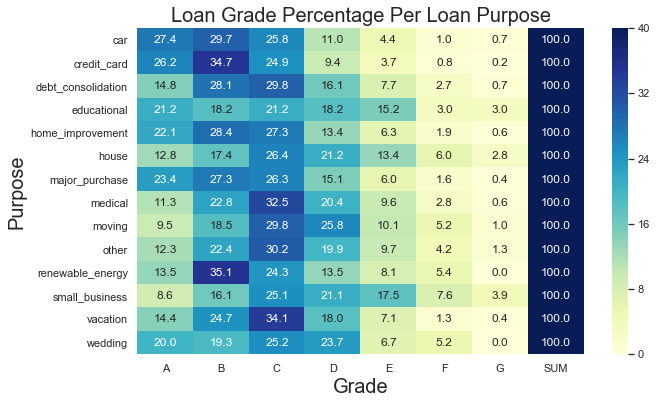

In [17]:
#Heatmap [normalized by loan purpose]
data = ans6_normbypurpose_df.to_numpy() #must convert dataframe to matrix

plt.figure(figsize=(10,6))
q6_bypurpose = sns.heatmap(data, 
                           annot=True,
                           annot_kws={"size": 12},
                           fmt='.1f', 
                           vmax=40, 
                           cmap="YlGnBu", 
                           xticklabels = ans6_normbypurpose_df.columns, 
                           yticklabels = ans6_normbypurpose_df.index)
sns.set(rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Loan Grade Percentage Per Loan Purpose')
plt.xlabel('Grade')
plt.ylabel('Purpose')
plt.show(q6_bypurpose)

### Question 1.4: 
How have loan grades varied throughout the years? (from Jon)

In [18]:
# Table (N)
ans7_cnt_df = count_n('purpose','grade', False)
ans7_cnt_df['SUM'] = ans7_cnt_df.sum(axis=1)
ans7_cnt_df.sort_values(by='SUM', ascending=False, inplace=True) #sort DF percentage
print(ans7_cnt_df)

# Table (normalized by loan year)
ans7_normbyyear_df = count_n('issue_year','grade', False)
ans7_normbyyear_df = norm_by(ans7_normbyyear_df, True)
ans7_normbyyear_df['SUM'] = round(ans7_normbyyear_df.sum(axis=1))
# print(ans7_normbyyear_df)

                       A      B      C     D     E     F    G    SUM
debt_consolidation  5775  11005  11679  6314  3009  1065  286  39133
credit_card         3894   5149   3700  1401   554   113   30  14841
home_improvement     965   1242   1195   586   277    81   28   4374
other                502    910   1226   809   396   170   53   4066
major_purchase       358    417    402   230    91    24    6   1528
small_business        70    131    204   171   142    62   32    812
medical               89    179    255   160    75    22    5    785
car                  197    214    186    79    32     7    5    720
moving                48     93    150   130    51    26    5    503
vacation              67    115    159    84    33     6    2    466
house                 51     69    105    84    53    24   11    397
wedding               27     26     34    32     9     7    0    135
renewable_energy       5     13      9     5     3     2    0     37
educational            7      6   

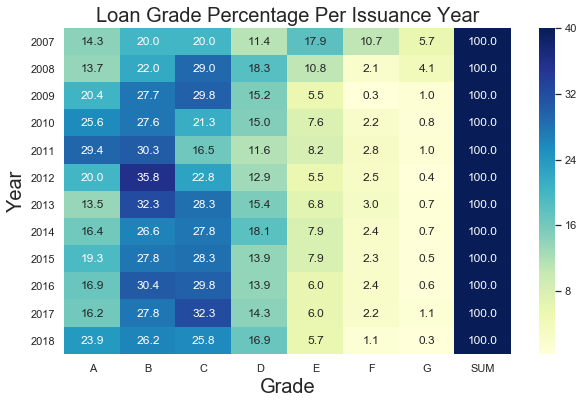

In [19]:
# Heatmap [normalized by loan year]
data3 = ans7_normbyyear_df.to_numpy() #must convert dataframe to matrix

plt.figure(figsize=(10,6))
q7_byyear = sns.heatmap(data3, 
                           annot=True,
                           annot_kws={"size": 12},
                           fmt='.1f', 
                           vmax=40, 
                           cmap="YlGnBu", 
                           xticklabels = ans7_normbyyear_df.columns, 
                           yticklabels = ans7_normbyyear_df.index)
q7_byyear.set_yticklabels(q7_byyear.get_yticklabels(), rotation=0)
sns.set(rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Loan Grade Percentage Per Issuance Year')
plt.xlabel('Grade')
plt.ylabel('Year')
plt.show(q7_byyear)

### Question 1.5: 
What is the distribution of loan amounts?  Per purpose?  Per loan grade? (from Jon)

In [20]:
# Purpose pie charts - one for number of loans and one for loan amount
purpose_summary = pd.DataFrame(df_cleaned.groupby('purpose')['funded_amnt'].agg({"sum",'count'}).\
                unstack()).reset_index().pivot(index='purpose',columns='level_0',values=0).reset_index()

# Percent of loans by purpose
px.pie(purpose_summary, 
       values='count', 
       names='purpose', 
       title='Percentage of Loans by Purpose',
       hole=.4).show()

# Percent of loan amount by purpose
px.pie(purpose_summary, 
       values='sum', 
       names='purpose', 
       title='Percentage of Loan Amount by Purpose',
       hole=.4)

In [21]:
# Grade pie charts - one for number of loans and one for loan amount
# Need to make the F, G grade legends bigger - if we need to use these graphs
grade_summary = pd.DataFrame(df_cleaned.groupby('grade')['funded_amnt'].agg({"sum",'count'}).
                unstack()).reset_index().pivot(index='grade',columns='level_0',values=0).reset_index()

grade_count_perc_fig = px.pie(grade_summary, values='count', 
                              names='grade', 
                              title='Percentage of Loans by Grade',
                              hole=.4)

grade_amount_perc_fig = px.pie(grade_summary, 
                               values='sum', 
                               names='grade', 
                               title='Percentage of Loan Amount by Grade',
                               hole=.4)

grade_count_perc_fig.update_layout(showlegend=False)
grade_amount_perc_fig.update_layout(showlegend=False)

grade_count_perc_fig.update_traces(textposition='inside', textinfo='percent+label').show()
grade_amount_perc_fig.update_traces(textposition='inside', textinfo='percent+label')




In [22]:
# Credit card loan took off after 2010 while wedding loans decreased to zero after 2015

# There were only educational loans from 2007 to 2010. Very strange that LC didn't capture 
# the opportunity when other lending platforms like SoFi and CommonBond were growting

# Not a particularly good graph (too busy) but helps analyze the historical trends

purpose_year = df_cleaned.groupby(['issue_year','purpose'])[['grade']].count()\
            .reset_index().rename(columns = {"grade":"loan_count"})

plt.figure(figsize=(20, 10))

# Change loan_count to log_count to get a different view
purpose_trend_plot = px.line(purpose_year,x="issue_year",
                             y="loan_count",
                             color="purpose",
                             title="Number of Loans Issued by Purpose",
                             log_y=True)

purpose_trend_plot.update_xaxes(title_text='Loan Issue year')
purpose_trend_plot.update_yaxes(title_text='Number of Loans (log)')



<Figure size 1440x720 with 0 Axes>

### Question 1.6: 
How many 3 and 5 yr loans were issued?  Per purpose?  Per loan grade? (from Jon)

In [23]:
# Majority of the loans are 3 years

term_df = pd.DataFrame(df_cleaned['term'].value_counts(normalize=True)).reset_index()\
.rename(columns={"term":"Percentage","index":"term"})

term_df__plot = px.pie(term_df,values='Percentage',
                       names='term',
                       title='Percentage of Loans by Term', 
                       hole=0.4)

term_df__plot.update_layout(showlegend=False)
term_df__plot.update_traces(textposition='inside', textinfo='percent+label')


In [24]:
# Percentage of 5-year loans has been consistent between 20% and 30%

term_df = (df_cleaned.groupby(['issue_year'])['term'].value_counts(normalize=True)*100).unstack().reset_index()

term_df = pd.melt(term_df,id_vars='issue_year', value_vars=[' 36 months',' 60 months']).fillna(0).\
                sort_values('value',ascending=True)

term_df_plot = px.bar(term_df,
                      x='issue_year',
                      y='value',
                      color='term')

term_df_plot.update_layout(title_text="36 vs. 60 Month Loan Term by Year")
term_df_plot.update_xaxes(title_text='Year')
term_df_plot.update_yaxes(title_text='Percentage of Loans (%)')



In [25]:
# 36 month loan is majority across all purposes
purpose_term_df = (df_cleaned.groupby(['purpose'])['term'].value_counts(normalize=True)*100).unstack().reset_index()

purpose_term_df = pd.melt(purpose_term_df,id_vars='purpose', value_vars=[' 36 months',' 60 months']).fillna(0).\
                sort_values('value',ascending=True)

purpose_term_plot = px.bar(purpose_term_df,
                           x='value',
                           y='purpose',
                           orientation='h',
                           color='term')


purpose_term_plot.update_layout(title_text="36 vs. 60 Month Loan Term by Purpose")
purpose_term_plot.update_xaxes(title_text='Percentage (%)')
purpose_term_plot.update_yaxes(title_text='Purpose')

In [26]:
# Lower grade loans tend to have higher percentage of 60-month loans
grade_term_df = (df_cleaned.groupby(['grade'])['term'].value_counts(normalize=True)*100).unstack().reset_index()
grade_term_df = pd.melt(grade_term_df,id_vars='grade', value_vars=[' 36 months',' 60 months']).fillna(0).\
                sort_values('grade',ascending=False)

grade_term_plot = px.bar(grade_term_df,
                         x='value',
                         y='grade',
                         orientation='h',
                         color='term')

grade_term_plot.update_layout(title_text="36 vs. 60 Month Loan Term by Grade")
grade_term_plot.update_xaxes(title_text='Percentage (%)')
grade_term_plot.update_yaxes(title_text='Grade')

Text(0.5, 0, 'Loan Term')

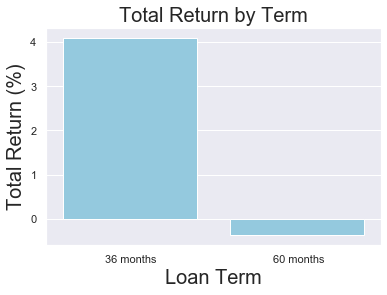

In [27]:
# Total Return by 3-year and 5-year loan excluding current loans
# 5-year loans lose money collectively
term_return_df = df_cleaned.loc[df_cleaned.loan_status_final!='Current'].\
        groupby('term')[['funded_amnt','total_pymnt']].sum()

term_return_df['return_pct'] = 100*(term_return_df["total_pymnt"]/term_return_df["funded_amnt"]-1)
term_return_df = term_return_df.reset_index()

sns.barplot(x="term",
            y="return_pct",
            data=term_return_df,
            color="skyblue")

plt.title("Total Return by Term")
plt.ylabel("Total Return (%)")
plt.xlabel("Loan Term")

Text(0.5, 0, 'Loan Term')

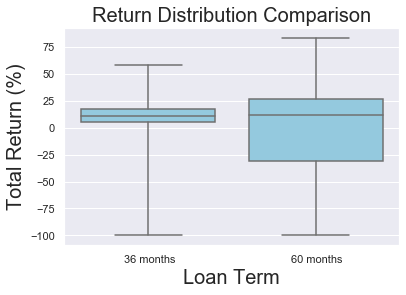

In [28]:
# 36-month loans are better investment. 
# Both of them have similar median but 36-month loans have much lower volatility/risk.

df_term_test = df_cleaned.loc[df_cleaned.loan_status_final!='Current']
df_term_test['return_pct'] = 100*(df_term_test["total_pymnt"]/df_term_test["funded_amnt"]-1)
sns.boxplot(x='term',
            y='return_pct',
            data=df_term_test, 
            whis='range', 
            color="skyblue")

plt.title("Return Distribution Comparison")
plt.ylabel("Total Return (%)")
plt.xlabel("Loan Term")

(-100, 100)

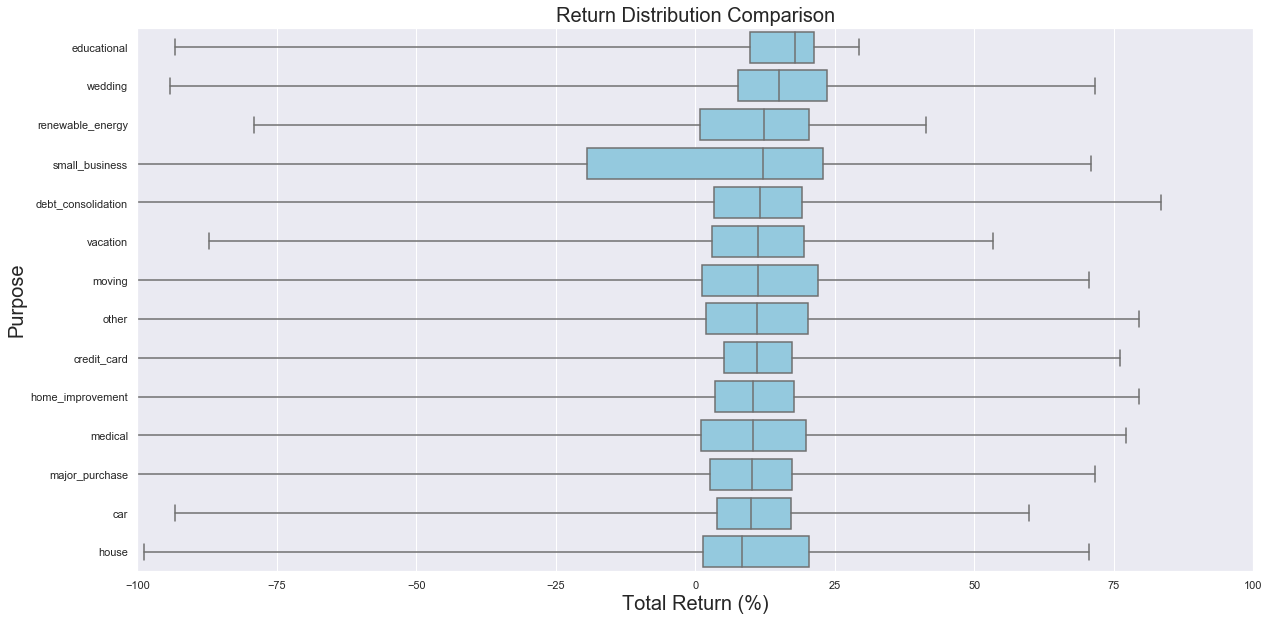

In [29]:
# Return Distribution per Purpose
# Small buiness has the highest middle 50% range

df_purpose = df_cleaned.loc[df_cleaned.loan_status_final!='Current']
df_purpose['return_pct'] = 100*(df_purpose["total_pymnt"]/df_purpose["funded_amnt"]-1)
plot_order = df_purpose.groupby("purpose")[["return_pct"]].median().\
        sort_values('return_pct',ascending=False).index

plt.figure(figsize=(20, 10))

sns.boxplot(x='return_pct',
            y='purpose',
            data=df_purpose, 
            whis='range', 
            color="skyblue",
            order=plot_order)

plt.title("Return Distribution Comparison")
plt.xlabel("Total Return (%)")
plt.ylabel("Purpose")
plt.xlim(-100,100)

## ASIDE:
**Thought**
- What are other appropriate questions? 
- Ex: how grade impacts interest rates?
- Ex: questions that address prepayment and default risks

**Vincent, Name, Jon**
- Do you guys have anything else to add from original Aiko EDA?
- How about Tier 2 Questions from Jon, such as interest stratification, ROI, payment patterns?
    - Ex 1: Vincent has analysis on how loans with different purposes have different interest rates.  Vincent also has some info on how credit card loans take up for instance 10% of the market, but they make up 5% of prepayments and 5% of defaults, so relatively speaking, credit card loans are less likely to deviate from payment schedule, etc etc.
    - Ex 2: Jon had a nice matrix going there, with "grades: A, B, C, etc" on one axis and "purpose" on another axis.  Another matrix was "grades: A, B, C, etc" vs. "year issued: 2007, 2008, etc"

# Stage 2: Great, that's what these loans are like.  Now, how do I as an investor make more intelligent decisions about which to pick? (Data Visualization)

### Question 2.1 (Mini-Project / Case Study): 
What are some other things that we can do to reduce our risk, without sacrifice return?  
- Answer is likely diversification.  
- The probability of getting screwed on 1 loan that goes bad is pretty high, but the probability that you lose a ton of money over 100 different loans is lower (it’s like if you toss a coin twice, the chance of you getting all tails is kind of high at 25%, but if you toss that coin 100 times the chance of you getting all tails is basically zero!)  Let's do the mini-project here, to show the benefits of diversification
    
**Jon Comment:** This question is a bit broad, must brainstorm more specific questions for whoever is working on this

### Question 2.2: 
**Part 1:** We care about charge off rates because unlike pre-payments, we lose money on the principal

In [30]:
#Isolate only the loans that have been completed
loancomp_bool = df_cleaned['loan_status_final'].str.contains(pat='Off|Fully')
df_loancomp = df_cleaned.loc[loancomp_bool] #only contains completed loans

#Feature Engineering
df_loancomp['charged'] = np.where( df_loancomp['loan_status_final']== 'Charged Off', 1, 0)
df_loancomp['prepaid'] = np.where( df_loancomp['prepayment_flag']==1, 1, 0)
df_loancomp['ontime'] = np.where( (df_loancomp['charged']==0)&(df_loancomp['prepaid']==0), 1, 0)

#Create new loan status based on three columns
df_loancomp['comp_loanstatus'] = np.where( df_loancomp.charged==1 , 'Charged Off', 
                                          np.where( df_loancomp.prepaid==1 , 'Early Prepayment', 'On Time'))


#### How does loan grades affect rates of 'Charged Off' and 'Early Prepayments'?

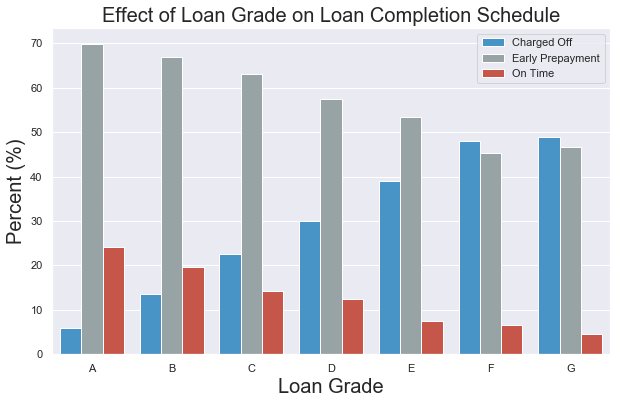

In [31]:
#Configure data
data = df_loancomp.groupby('grade')['charged', 'prepaid', 'ontime'].mean().multiply(100).reset_index()
data = pd.DataFrame(data.set_index(['grade']).stack()).reset_index() #reformat for plot
data.columns = ['grade','lost_money','percent'] #rename columns
data['lost_money'] = np.where( data['lost_money']== 'charged', 'Charged Off', np.where( data['lost_money']== 'ontime', 'On Time','Early Prepayment'))


#Plot
charged_color, early_color, ontime_color = ["#3498db", "#95a5a6", '#db4534']
plt.figure(figsize=(10,6))
grade_plot = sns.barplot(y='percent',
                        x='grade',
                        data=data,
                        hue = 'lost_money',
                        palette = [charged_color, early_color, ontime_color])
grade_plot.legend(loc='upper right', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Loan Grade on Loan Completion Schedule')
plt.ylabel('Percent (%)')
plt.xlabel('Loan Grade')
plt.show(grade_plot)


# CONCLUSION:
    # As grade worsens, rates of charge off increase, and early/ontime payments decrease
    # B-D grades may be happy medium between the three outcomes

#### How does loan type affect rates of 'Charged Off' and 'Early Prepayments'?

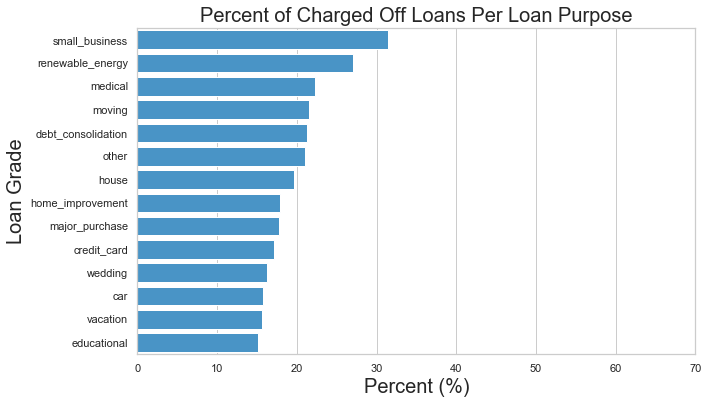

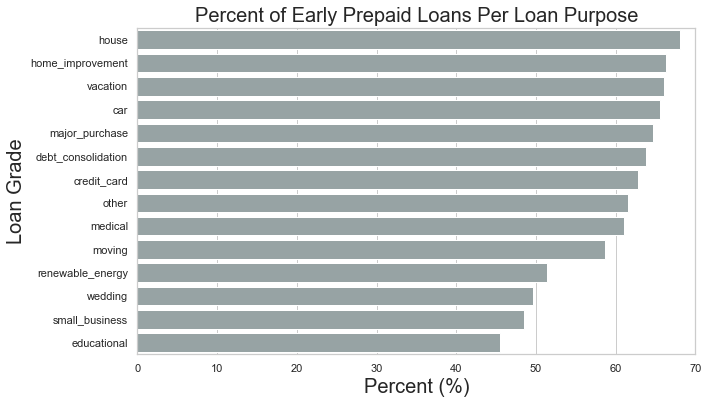

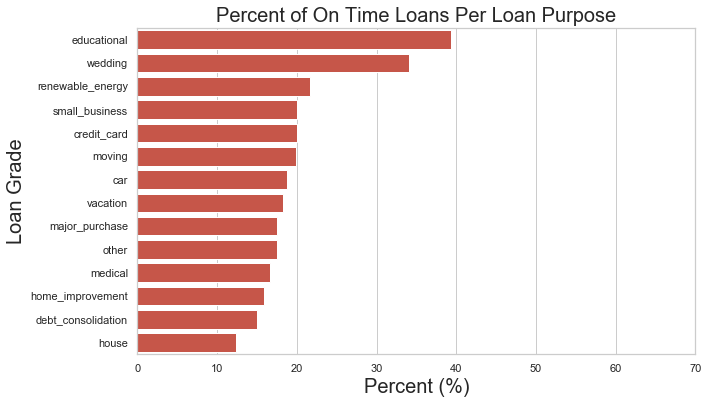

In [32]:
#Configure data
data = df_loancomp.groupby('purpose')['charged', 'prepayment_flag', 'ontime'].mean().multiply(100).reset_index()
data.columns = ['purpose', 'Charged Off', 'Early Prepaid', 'On Time']

# ===================================================================================
#Plot ONLY charged off data
data_charged = data.sort_values(by='Charged Off',ascending=False)
plt.figure(figsize=(10,6))
perc_charged_bypurpose = sns.barplot(x='Charged Off',
                                     y='purpose',
                                     data=data_charged,
                                     color=charged_color)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Percent of Charged Off Loans Per Loan Purpose')
plt.xlabel('Percent (%)')
plt.ylabel('Loan Grade')
plt.xlim(0, 70)
plt.show(perc_charged_bypurpose)

# ===================================================================================
#Plot ONLY Early Prepaid data
data_charged = data.sort_values(by='Early Prepaid',ascending=False)
plt.figure(figsize=(10,6))
perc_early_bypurpose = sns.barplot(x='Early Prepaid',
                                   y='purpose',
                                   data=data_charged,
                                   color=early_color)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Percent of Early Prepaid Loans Per Loan Purpose')
plt.xlabel('Percent (%)')
plt.ylabel('Loan Grade')
plt.xlim(0, 70)
plt.show(perc_early_bypurpose)

# ===================================================================================
#Plot ONLY on Time data
data_charged = data.sort_values(by='On Time',ascending=False)
plt.figure(figsize=(10,6))
perc_ontime_bypurpose = sns.barplot(x='On Time',
                                    y='purpose',
                                    data=data_charged,
                                    color=ontime_color)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Percent of On Time Loans Per Loan Purpose')
plt.xlabel('Percent (%)')
plt.ylabel('Loan Grade')
plt.xlim(0, 70)
plt.show(perc_ontime_bypurpose)

# CONCLUSIONS:
    # Education/weddings have highest rate of on time; lowest rates of charged off 
    # Credit card and debt consolidation overwhelming majority of all loans
        # Charge off rate: Credit card < debt consolidation
        # On time rate: Credit card > debt consolidation


#### How does TERM LENGTH affect the rate of loan charge off? 


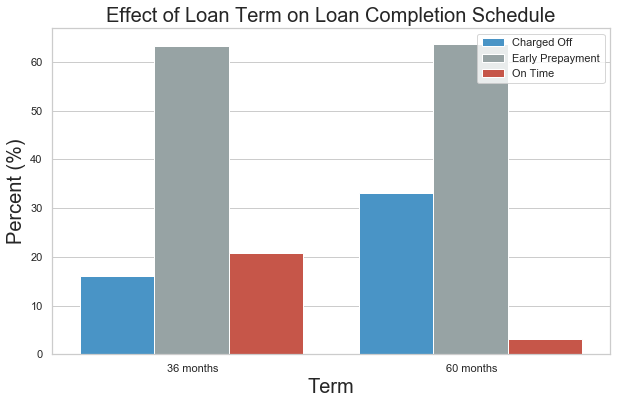

In [33]:
#Configure data
data = df_loancomp.groupby('term')['charged', 'prepaid', 'ontime'].mean().multiply(100).reset_index()
data = pd.DataFrame(data.set_index(['term']).stack()).reset_index() #reformat for plot
data.columns = ['term','lost_money','percent'] #rename columns
data['lost_money'] = np.where( data['lost_money']== 'charged', 'Charged Off', np.where( data['lost_money']== 'ontime', 'On Time','Early Prepayment'))


#Plot
charged_color, early_color, ontime_color = ["#3498db", "#95a5a6", '#db4534']
plt.figure(figsize=(10,6))
term_plot = sns.barplot(y='percent',
                        x='term',
                        data=data,
                        hue = 'lost_money',
                        palette = [charged_color, early_color, ontime_color])
term_plot.legend(loc='upper right', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Loan Term on Loan Completion Schedule')
plt.ylabel('Percent (%)')
plt.xlabel('Term')
plt.show(term_plot)

# CONCLUSIONS:
    # Rates of early prepayment similar between groups
    # 36mo has dramatically (1) higher rates of on time loans, (2) lower rates of charged off loans


#### How does INSTALLMENT affect the rate of loan charge off? 

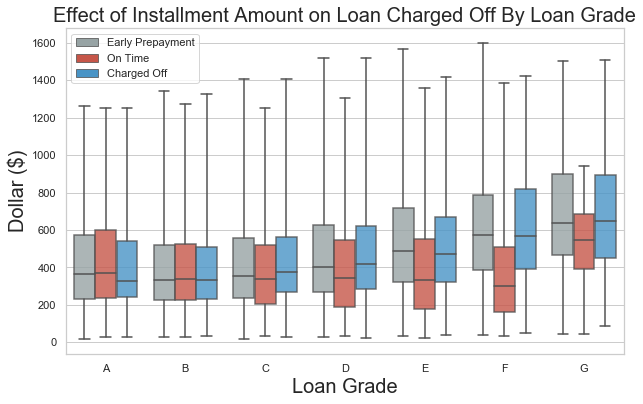

In [34]:
data = df_loancomp[['grade','comp_loanstatus', 'installment']].sort_values(by='grade', ascending=True)
# data.groupby(['grade', 'comp_loanstatus']).agg('median')

plt.figure(figsize=(10,6))
installment_bygrade = sns.boxplot(y="installment",
                               x="grade",
                               hue= 'comp_loanstatus',
                               data=data,
                               whis="range",
                               palette=[early_color, ontime_color, charged_color],
                               boxprops=dict(alpha=.8))     
installment_bygrade.legend(loc='upper left', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Installment Amount on Loan Charged Off By Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Dollar ($)')
plt.show(installment_bygrade)

# CONCLUSION:
    # Grade A-C: Median installment similar across outcomes
    # Grade D-G: Median installment least among on time outcome
    # Similar installments between early and charged outcomes, across grades [do not have explanation]


#### How does FICO LOW affect the rate of loan charge off? 


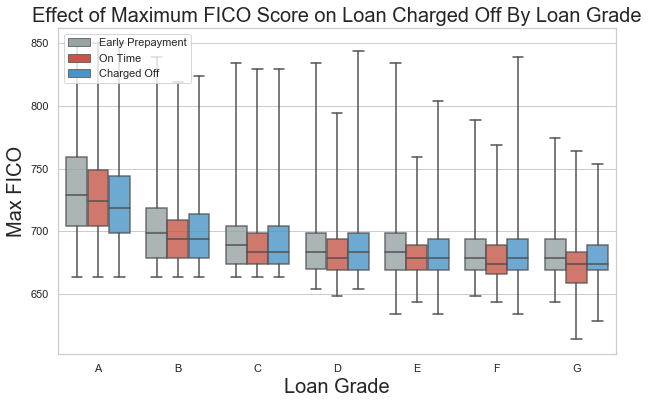

In [35]:
data = df_loancomp[['grade','comp_loanstatus', 'fico_range_high']].sort_values(by='grade', ascending=True)

plt.figure(figsize=(10,6))
ficohigh_bygrade = sns.boxplot(y="fico_range_high",
                               x="grade",
                               hue= 'comp_loanstatus',
                               data=data,
                               whis="range",
                               palette=[early_color, ontime_color, charged_color],
                               boxprops=dict(alpha=.8))     
ficohigh_bygrade.legend(loc='upper left', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Maximum FICO Score on Loan Charged Off By Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Max FICO')
plt.show(ficohigh_bygrade)

# CONCLUSIONS:
    # Noticable differences in max FICO score between grades (not surprised)
    # Negligable differences between loan outcome


#### How does FICO LOW affect the rate of loan charge off? 


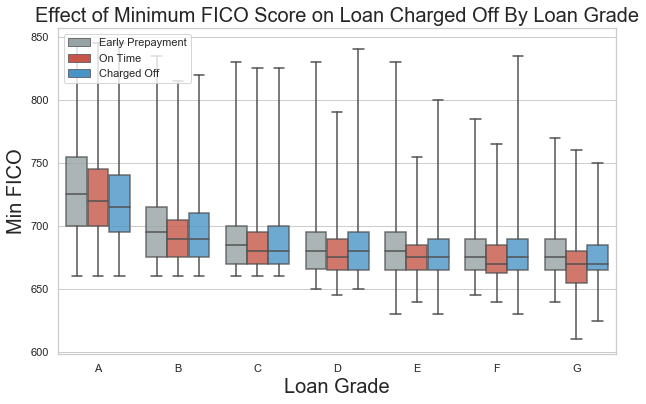

In [36]:
data = df_loancomp[['grade','comp_loanstatus', 'fico_range_low']].sort_values(by='grade', ascending=True)

plt.figure(figsize=(10,6))
ficolow_bygrade = sns.boxplot(y="fico_range_low",
                               x="grade",
                               hue= 'comp_loanstatus',
                               data=data,
                               whis="range",
                               palette=[early_color, ontime_color, charged_color],
                               boxprops=dict(alpha=.8))     
ficolow_bygrade.legend(loc='upper left', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Minimum FICO Score on Loan Charged Off By Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Min FICO')
plt.show(ficolow_bygrade)

# CONCLUSIONS:
    # Noticable differences in max FICO score between grades (not surprised)
    # Negligable differences between loan outcome


#### How does Debt-to-Income Ratio affect the rate of loan charge off? 


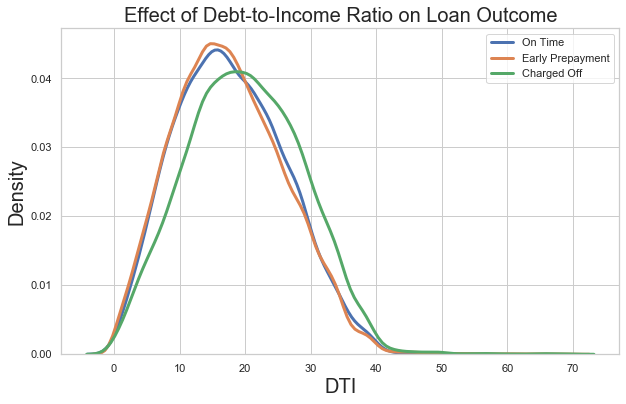

In [37]:
data = df_loancomp[ ['comp_loanstatus', 'dti'] ]
data = data[ (~data.dti.isnull()) & (data.dti<70) ]
data.comp_loanstatus.unique()
outcome_type=['On Time', 'Early Prepayment', 'Charged Off']

plt.figure(figsize=(10,6))
for out in outcome_type:
    # Subset to the airline
    subset = data[data['comp_loanstatus'] == out]
    
    # Draw the density plot
    dti_density = sns.distplot(subset['dti'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = out)
    
dti_density.legend(loc='upper right', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Debt-to-Income Ratio on Loan Outcome')
plt.xlabel('DTI')
plt.ylabel('Density')
plt.show(dti_density)

#### How does REVOLVING BALANCE UTILIZATION affect the rate of loan charge off? 


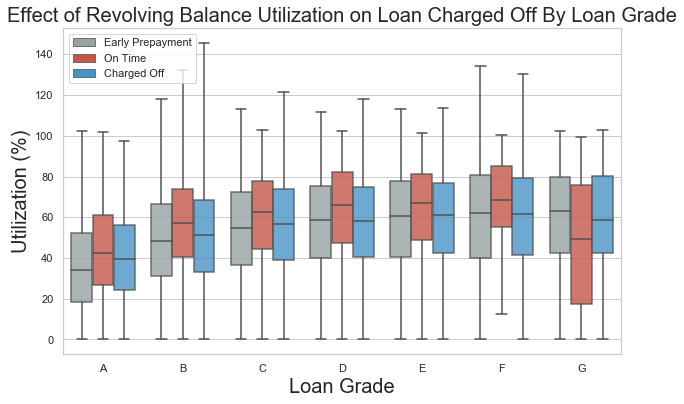

In [38]:
data = df_loancomp[['grade','comp_loanstatus', 'revol_util']].sort_values(by='grade', ascending=True)
# data.groupby(['grade', 'comp_loanstatus']).agg('median')

plt.figure(figsize=(10,6))
revolvutil_bygrade = sns.boxplot(y="revol_util",
                               x="grade",
                               hue= 'comp_loanstatus',
                               data=data,
                               whis="range",
                               palette=[early_color, ontime_color, charged_color],
                               boxprops=dict(alpha=.8))     
revolvutil_bygrade.legend(loc='upper left', shadow=False)
sns.set(style = 'whitegrid', 
        rc={"font.size":20,
            "axes.titlesize":20,
            "axes.labelsize":20})
plt.title('Effect of Revolving Balance Utilization on Loan Charged Off By Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Utilization (%)')
plt.show(revolvutil_bygrade)

# CONCLUSION:
    # On time outcome tended to have higher revolving balance utilization across Grade A-F
    

### Question 2.3: 
Are there enough loans that I can invest? 
- Ex: educational loans have good payout but what if there are not many of them for me to deploy my money. This would be a secondary concern (from Vincent)

**Jon comments:** This is addressed in Question 1.2, correct? 

### Question 2.3: (Related to above question) 
What the directionality of these listed 11 factors, i.e. – higher FICO score correlates to lower risk of default / higher trustworthiness, but what about less clear things like purpose of the loan?  Which factors positively correlate to trustworthiness, and which negatively correlate?  It’s basically like asking: does turning this dial clockwise / counterclockwise increase my potential loss or decrease?  Let’s talk about directionality first (from Joe)

**Jon's Comments:**
- Verbose, should discuss more specific questions
- Not clear what 'trustworthiness' refers to
- Admittedly a ticky-tacky phrasing thing, but Would try to avoid implying causality between 'dial' and ROI
    - Ex: Borrows with higher FICO scores tended to produce higher ROI

# Stage 3: Machine learning
### Project Idea 3:
- Build a random forest classifier that predicts if a loan will experience a loss of 20% or worse over its investment horizon or not

### Application 1:  Use ML to identify 'diamonds in the rough'? 
- Among risky loans, how can I identify the ones that will give higher returns in the long run? (from Vincent)

### Application 2: Use ML to predict loans that default
- What type of loans that will lead to default? As there is more information on the borrower's payment pattern, how to update the default prediction?

**Jon comment:** Not sure what this question means (see updated question)

### Application 3: Use ML to determine investor feature importance
- Of the 11 features available to investors, what are the most important? (from Joe)

# Stage 4: Survival Analysis (Optional):


### 1. Build the KM curve

### 2. Build the Cox model, using the same predictors / features as the random forest classifier from earlier
- Note: this should take literally 1-2 days for one person to do.  Faster if 2 people work jointly